Load Dataset
● Import BERT model and BERT Tokenizer
● Data preparation
○ Text cleaning
○ Text encoding
○ Defining dataloaders
● Model fine-tuning
○ Defining model architecture
○ Model training and evaluation

# Table Of Contents
1.setup
* using Google colab for training
* installing Hugging Face's
* Transformers Library


2.Loading & Undderstanding BERT
* Download pretrained BERT model
* Tokenization and input formattin
* understanding i/p and o/p
3.Preparing Data
* loading and Reading Twitter Airline
text Cleaning
* preparing i/p and o/p data
* training and validation data
* define dataloaders
4.Model Finetuning
* Approach:fine-tuning only head
* define model architecture
* define optimizer and loss fxn
* model training and Evaluation
* Train the model
* model evaluation

In [1]:
import torch
#check GPU avvailability
if torch.cuda.is_available():
  #select GPU
  device=torch.device("cuda")
device

device(type='cuda')

In [2]:
#check GPU name
torch.cuda.get_device_name(0)

'Tesla T4'

# 1.2 installing Hugging Face's Transformer Libraray
The Hugging Face Transformers library is a popular open-source library that provides state-of-the-art pre-trained models for natural language processing (NLP) tasks such as text classification, translation, question answering, summarization, and more. It supports a variety of transformer architectures, including BERT, GPT, RoBERTa, and T5, among others. The library offers seamless integration with PyTorch and TensorFlow, making it easy to fine-tune or deploy models for custom use cases. Hugging Face also provides tools for tokenization, model inference, and an extensive model hub, simplifying NLP development for researchers and practitioners.

In [3]:
!pip install transformers

## 2.Loading & Understanding BERT

## 2.1 Download pretrained BERT model
we will use uncased pre-trained version of BERT base model.It was trained on lower-cased English text
we can find pre-trained models here https://huggingface.co/transformers/v3.3.1/pretrained_models.html

In [4]:
from transformers import BertModel
bert=BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
print(bert)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

# 2.3 Tokenization and I/P formatting
Download BERT tokenizer

In [5]:
#importing fast "BERT" tokenizer
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# steps Folowed for i/p formatting
1. tokenization
2. special tokens
  * prepare the [CLS] token to start of the sequence
  * Append the [SEP] tkn to the end of seq
3. pad sequences
4. converting tkns to integers
5. create attention masks to avoid pad tokens

In [6]:
#i/p text
text="Meghana is truely irritating"
sent_id=tokenizer.encode(text,add_special_tokens=True,
                         max_length=10,
                         Truncation=True,
                         #add pad tkns to right side of seq
                         pad_to_max_length='right')

print("Integer sequence: {}" .format(sent_id))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Keyword arguments {'Truncation': True} not recognized.


Integer sequence: [101, 12669, 15788, 2003, 2995, 2135, 29348, 102, 0, 0]


In [ ]:
#convert inetgers back to text
print("tokenized text:", tokenizer.convert_ids_to_tokens(sent_id))

tokenized text: ['[CLS]', 'meg', '##hana', 'is', 'true', '##ly', 'irritating', '[SEP]', '[PAD]', '[PAD]']


In [ ]:
#convert Integers back to text
print("Decoded text: {}".format(tokenizer.decode(sent_id)))

Decoded text: [CLS] meghana is truely irritating [SEP] [PAD] [PAD]


In [7]:
#mask to avoid performing attention on pading token indices
#mask values: 1 for tokens that are not masked, 0 for masked tokens
att_mask=[int(tok>0) for tok in sent_id]
print("Attention mask: {}".format(att_mask))
#avoid the ones with 0

Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


## 2.3 Understanding i/p and o/p

In [8]:
#convert list to tensors
sent_id=torch.tensor(sent_id)
att_mask=torch.tensor(att_mask)

#reshaping tensor in the form of (batch,text length)
sent_id=torch.unsqueeze(sent_id,0)
att_mask=torch.unsqueeze(att_mask,0)

print(sent_id)

tensor([[  101, 12669, 15788,  2003,  2995,  2135, 29348,   102,     0,     0]])


In [9]:
#pass integer seq to bert model
outputs=bert(sent_id,attention_mask=att_mask)
# print(outputs)

In [10]:
## unpack o/p of bert model
# hidden states at each timestep
all_hidden_state=outputs[0]
cls_hidden_state=outputs[1] #encodes entire i/p seq and this is something we are inerested in to solve our sentimenet analysis problem
print("shape of Last hidden states: ",all_hidden_state.shape) #10 since seq len is 10
print("shape of CLS hidden states: ",cls_hidden_state.shape)

shape of Last hidden states:  torch.Size([1, 10, 768])
shape of CLS hidden states:  torch.Size([1, 768])


In [11]:
cls_hidden_state

tensor([[-8.1672e-01, -2.9591e-01, -4.2227e-02,  6.6374e-01,  3.7756e-01,
          3.7388e-02,  8.3700e-01,  1.5344e-01, -5.3711e-02, -9.9994e-01,
          8.1940e-03,  4.4194e-01,  9.7769e-01, -1.1012e-02,  9.2739e-01,
         -5.5441e-01,  2.1399e-01, -4.9636e-01,  3.0736e-01, -5.8997e-01,
          6.3555e-01,  9.9441e-01,  5.6447e-01,  2.4504e-01,  3.1051e-01,
          6.6572e-01, -6.0505e-01,  9.3100e-01,  9.3366e-01,  6.8934e-01,
         -5.8478e-01,  7.6967e-02, -9.8077e-01, -1.3987e-01, -2.9001e-01,
         -9.8587e-01,  2.2287e-01, -7.2018e-01,  6.0225e-02,  1.0423e-01,
         -8.6512e-01,  2.1975e-01,  9.9961e-01, -3.2371e-01, -1.5275e-02,
         -2.5988e-01, -9.9997e-01,  2.4922e-01, -8.7932e-01, -2.1958e-02,
          1.1871e-01, -1.3824e-01,  3.4520e-02,  3.3729e-01,  2.8527e-01,
          1.5988e-01, -1.8688e-01,  1.5842e-02, -1.3244e-01, -4.6893e-01,
         -5.7838e-01,  1.7639e-01, -2.3637e-01, -9.1825e-01, -9.4732e-02,
         -1.2783e-01, -3.8693e-02, -1.

# 3 Preparing Data

## 3.1 loadiing and reading twitter airline

In [12]:
import pandas as pd

#increase o/p column width
pd.set_option('display.max_colwidth',200)
df=pd.read_csv("Tweets.csv")
df.head()

#interested in to columns airline_sentiment,text

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df['text'].sample(5)

,text
3907,@united why haven't you updated that flight 4411 is delayed? Super frustrating
13539,"@AmericanAir Last thing I want to deal w/ before 8 on a Mon! I've already waited the suggested wait time, so I hope I get a call back ASAP."
10252,"@USAirways @AmericanAir Suggestions , been on hold 2 hrs for flight that is now about to pass departure...Dealing w ny weather, need change"
7148,“@JetBlue: Our fleet's on fleek. http://t.co/3Ltx7JKBo9” is fleek dead yet now?
7166,@JetBlue Hopefully now my application for JetBlue donut designer will finally go through the proper channels.


In [13]:
df['airline_sentiment'].value_counts() #class distribution

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [ ]:
df['airline_sentiment'].value_counts(normalize=True)

,proportion
airline_sentiment,
negative,0.626913
neutral,0.211680
positive,0.161407


In [84]:
#saving the value counts to a list
class_counts=df['airline_sentiment'].value_counts().tolist()

## 3.2 Text Cleaning

In [15]:
import re
def preprocessor(text):
  text=text.lower()
  text=re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions as twitter handla will have '@'
  # text=re.sub(r'#[A-Za-z0-9]+','',text) #remove hashtags
  text=re.sub(r'http\s+','',text) #remove links
  #split toen to remove extra spaces
  tokens=text.split( )
  #join token by space
  return " ".join(tokens)

In [16]:
df['clean_text']=df['text'].apply(preprocessor)

In [17]:
#save cleaned text and labels to a  variable
text=df['clean_text'].values
labels=df['airline_sentiment'].values

In [ ]:
text[50:55]

array(['is flight 769 on it\'s way? was supposed to take off 30 minutes ago. website still shows "on time" not "in flight". thanks.',
       'julie andrews all the way though was very impressive! no to',
       'wish you flew out of atlanta... soon?',
       'julie andrews. hands down.',
       'will flights be leaving dallas for la on february 24th?'],
      dtype=object)

## 3.3 preparing i/p ans o/p data

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
labels

array([1, 2, 1, ..., 1, 0, 1])

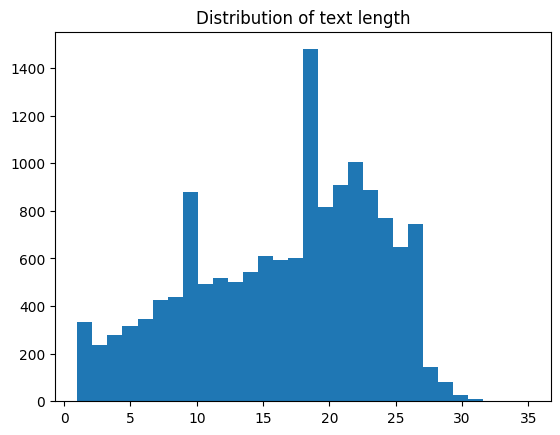

In [19]:
import matplotlib.pyplot as plt
num=[len(i.split()) for i in text]
plt.hist(num,bins=30)
plt.title("Distribution of text length")
plt.show()


In [21]:
max_len=25

In [22]:
#library for progress bar
from tqdm import notebook
# to save ineteger seq
sent_id=[]
for i in notebook.tqdm(range(len(text))):
  encoded_sent=tokenizer.encode(text[i],add_special_tokens=True,
                                max_length=max_len,
                                truncation=True,
                                pad_to_max_length='right')
  sent_id.append(encoded_sent)

  0%|          | 0/14640 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [25]:
print("Ineteger seq:",sent_id[1]) #here 101 at begin and 102 at end are special tkns and last ones 0's are padded tkns since our max_len=25

Ineteger seq: [101, 4606, 2017, 1005, 2310, 2794, 12698, 2000, 1996, 3325, 1012, 1012, 1012, 26997, 2100, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# Purpose of Attention Masks:

# Focus on relevant tokens: Attention masks guide the model to focus on the important parts of the input sequence (the actual words) and ignore the padding tokens.
# Creating the mask:

# att_mask = [int(token_id > 0) for token_id in sent]: This is the core part where the attention mask is created for the current sentence (sent).
# It uses a list comprehension to iterate through each token_id within the sentence.
# int(token_id > 0): This condition checks if the token_id is greater than 0.
# If token_id is greater than 0 (meaning it's a real token, not padding), it's converted to 1.
# If token_id is 0 (padding token), it's converted to 0.
# The resulting list att_mask now contains 1s for real tokens and 0s for padding tokens.
# #create attention masks
attention_masks=[]
for sent in sent_id:
  att_mask=[int(token_id>0) for token_id in sent]
  attention_masks.append(att_mask)

## 3.4 Training and Validation Data

In [27]:
from sklearn.model_selection import train_test_split
#90% for training 10% for validation sets
train_inputs,validation_inputs,train_labels,validation_labels=train_test_split(sent_id,labels,random_state=2018,test_size=0.1,stratify=labels)
#do the same for masks #as attention masks were also passed along with i/p
train_masks,validation_masks,_,_=train_test_split(attention_masks,labels,random_state=2018,test_size=0.1,stratify=labels)

## 3.5 Define Dataloaders

In [28]:
#convery all i/p and labels in to torch tensors,the required datatype for our model
train_inputs=torch.tensor(train_inputs)
validation_inputs=torch.tensor(validation_inputs)

train_labels=torch.tensor(train_labels)
validation_labels=torch.tensor(validation_labels)

train_masks=torch.tensor(train_masks)
validation_masks=torch.tensor(validation_masks)

In [29]:
#create data loaders
from torch.utils.data import TensorDataset,DataLoader,RandomSampler,SequentialSampler

#the data loader needs to know our batch size for trianing,so we specify it here
#for fine-tuning BERT on a specific task,teh authors recommend a batch size of 16 or 32
batch_size=32
#craete a dataloader for our training set
train_data=TensorDataset(train_inputs,train_masks,train_labels)
train_sampler=SequentialSampler(train_data)
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

#create the dataLoader for our validation set
#Dataset wrapping tensors
validation_data=TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler=SequentialSampler(validation_data) #use seq sampler bcs no need to suffle in valudation data set
validation_dataloader=DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

In [31]:
#create an iterator object
iterator=iter(train_dataloader)

#load batch data
sent_id,mask,target=next(iterator) # use next(iterator) instead of iterator.next()


In [36]:
sent_id.shape #32 is batch size and 25 is seq len

torch.Size([32, 25])

In [32]:
sent_id

tensor([[  101,  4005,  3975,  2039,  2026, 11079,  1029,  2085,  2064,  1005,
          1056,  8014,  3462,  1998, 25416,  8630,  4923,  2005,  1016, 26291,
          2015,  1029,  2339,   102,     0],
        [  101,  3531,  2507,  2569,  4283,  2000,  7158,  1999,  9925,  2436,
          2005,  5094,  2033,  2005,  6719,  2048,  2847,   999,  2002,  1005,
          1055,  6429,  1012,  3260,   102],
        [  101,  6659,  4899,  2006,  6205,  2629,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  2061,  2043,  2001,  1045,  4011,  2000,  2655,  1996,  4274,
          4624,  1029,  2926,  2144,  2026, 11079,  2409,  2033,  2000,  3495,
          2655,  1996,  2364,  1015,   102],
        [  101,  2057,  2128,  8654,  2098,  1998,  9364,  2057,  2031,  2000,
          3524,  1037,  2878,  2154,  2000,  2707,  2256, 10885,  1012,  2012,
          2122, 27092,  2142, 

In [ ]:
#pass i/ps to the model
outputs=bert(sent_id,              #integer sequence
             attention_mask=mask)   #attention masks

In [37]:
#hidden states
hidden_states=outputs[0]

#[cls] hidden state
cls_hidden_state=outputs[1]

print("shape of hidden states: ",hidden_states.shape) #768 is dim of o/p vector
print("shape of cls hidden states: ",cls_hidden_state.shape)



shape of hidden states:  torch.Size([1, 10, 768])
shape of cls hidden states:  torch.Size([1, 768])


# 4.Model Finetuning

> The pretrained model is trained on the general domain corpus.so,finetuning the pretrained model helps in the capturing the specific features from our custom dataset
1. Every pre trained model is trained using 2 diff layers:Backbone and Head
* Backbone refers to the pretrained model architecture
* Head refers to the dense layer added on top of backbone.Generally the layer is used for the classification tasks
Hence,we can fintune the pretrained model in 2 ways
1. Fine-Tuning only Head(or Dence Layer)
1.1 CLS token
1.2 Hidden states
2. Fine-Tunin both Backbone & Head
1.1 CLS token
1.2 Hidden states


# 4.1 Approach:Fine-Tuning only head
As the name suggests,in this approach,we freeze the BB and train only head or dense layer

## Steps to Follow
1.Turn off Gradients
2.Define model architecture
3.Define optimizer and loss
4.Define Train and Evaluate
5.Train teh model
6.Evaluate the model


In [38]:
#turn off the gradient of all the parameters
for param in bert.parameters():
  param.requires_grad=False

# 4.2 Define Modle Architecture

In [77]:
import torch.nn as nn
import torch.nn.functional as F
class classifier(nn.Module):
  #define the layers and wrappers used by model
  def __init__(self,dropout=0.5):
    super(classifier,self).__init__()
    self.bert=bert
    #dense layer 1
    #as the dim of bert model o/p is 768 right,therfore the i/p dim are the first linear layer is 768
    #512 is o/p units specifies by user this is hyper paarmeter
    self.fc1=nn.Linear(768,512)
    #dense layer 2
    #since 3 labels o/p dim of secon dense layer is 3
    self.fc2=nn.Linear(512,3)
    #dropout layer
    self.dropout=nn.Dropout(0.1)
    # ReLU Activation Function
    self.relu = nn.ReLU()  # Fix: Define ReLU properly
    #softmax AF
    self.softmax=nn.LogSoftmax(dim=1)

  #define the forward pass
  def forward(self,sent_id,mask):
    #pass the i/p to model
    # all_hidden_state,cls_hidden_state=self.bert(sent_id,attention_mask=mask)

    _,cls_hidden_state=self.bert(sent_id,attention_mask=mask,return_dict=False)

    #pass CLS hidden state to dense layer
    x=self.fc1(cls_hidden_state)
    #apply relu AF
    x=self.relu(x)
    #apply dropout
    x=self.dropout(x)
    #pass i/p to o/p layer
    x=self.fc2(x)
    #apply softmax AF
    x=self.softmax(x)
    return x




In [78]:
#create the model
model=classifier(bert)
#push the modle to GPU,if available
model=model.to(device)

In [72]:
model

classifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [79]:
#push the tensors to GPU
sent_id=sent_id.to(device)
mask=mask.to(device)
target=target.to(device)

#pass i/ps to the model
output=model(sent_id,mask)

In [80]:
#understand outputs
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.1204, -0.0015, -0.1994,  ..., -0.2054,  0.3803,  0.3111],
         [-0.3494, -0.7574, -0.3358,  ...,  0.0582,  1.4356,  0.5522],
         [-0.0349, -0.5173, -0.8148,  ..., -0.6723,  0.7762, -0.6548],
         ...,
         [ 0.5764, -0.0970, -0.1267,  ...,  0.2058, -0.2581, -0.4173],
         [-0.1569, -0.0993,  0.2161,  ...,  0.1289,  0.3344,  0.1612],
         [-0.1652, -0.4817,  0.2695,  ...,  0.3359,  0.4633, -0.0662]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.1672e-01, -2.9591e-01, -4.2227e-02,  6.6374e-01,  3.7756e-01,
          3.7388e-02,  8.3700e-01,  1.5344e-01, -5.3711e-02, -9.9994e-01,
          8.1940e-03,  4.4194e-01,  9.7769e-01, -1.1012e-02,  9.2739e-01,
         -5.5441e-01,  2.1399e-01, -4.9636e-01,  3.0736e-01, -5.8997e-01,
          6.3555e-01,  9.9441e-01,  5.6447e-01,  2.4504e-01,  3.1051e-01,
          6.6572e-01, -6.0505e-01,  9.3100e-01,  9.3366e-01,  6.893

In [81]:
#no.of trainable parameters
def count_parameters(model): #numel counts no.of units in tensor
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 395,267 trainable parameters


# 4.3 Define Optimizer and Loss Function

In [82]:
#Adam optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


Text(0.5, 1.0, 'class Distribution')

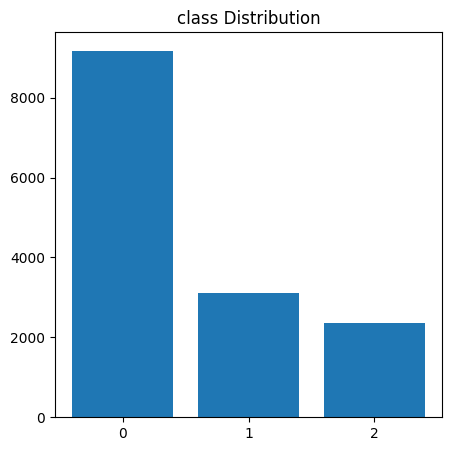

In [85]:
#understand the class distribution
keys=['0','1','2']

#set figure size
plt.figure(figsize=(5,5))
plt.bar(keys,class_counts)

plt.title('class Distribution')


In [87]:
import numpy as np
#libraray for computing class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(labels),y=labels)
print("class weights:" ,class_weights)



class weights: [0.53170625 1.57470152 2.06517139]


In [88]:
#converting a list of class weights to a tensor
weights=torch.tensor(class_weights,dtype=torch.float)
#transfer to GPU
weights=weights.to(device)

#define the loss fxn
cross_entropy=nn.NLLLoss(weight=weights) #will handle class imbalance problem to some extent

In [97]:
#it is like calculating time req by one epoch,u can skip if u want
import time
import datetime

#compute time in hh:mm:ss
def format_time(elapsed):
  #round to the nearest second
  elapsed_rounded=int(round((elapsed)))

  #format as hh:mm:ss
  return str(datetime.timedelta(seconds=elapsed_rounded))

# 4.4 Model training and Evaluation

The DL model is trained in teh form of epochs where in each epoch consists of several batches

During Training,for each batch we need to
1. perform forwad pass
2. compute loss
3. Backpropagate Loss
4. Update weights

where as during evaluation,for each batch we need to
1. perform forward pass
2. compute loss

1. Training: Epoch-> Batch ->Forward Pass ->compute loss ->Backpropagate loss ->update weights
2. Evaluation: Epoch -> Batch ->Forward Pass ->compute loss


In [ ]:
# Training: Epoch-> Batch ->Forward Pass ->compute loss ->Backpropagate loss ->update weights
# Evaluation: Epoch -> Batch ->Forward Pass ->compute loss


Hence,for each epoch,we have trainig and validation phase.After each batch we need to:
Hence, for each epoch, we have a training phase and a validation phase. After each batch we need to:

Training phase

1. Load data onto the GPU for acceleration

2. Unpack our data inputs and labels

3. Clear out the gradients calculated in the previous pass.

4. Forward pass (feed input data through the network)

5. Backward pass (backpropagation)

6. Clip the norm of gradients to 1

In [96]:
#define a function for training the model
def train():
    print("\nTraining...")

    # Set the model in training phase - Dropout layers are activated
    model.train()

    # Record the current time
    t0 = time.time()
    total_loss, total_accuracy = 0, 0

    # Create an empty list to save the model predictions
    total_preds = []

    # For each batch of training data
    # We will use the train data loader to fetch the batches that will be passed to the model.
    # The model output will be used to compute the loss, which will be added back to the total loss.
    for step, batch in enumerate(train_dataloader):
        # Progress update after every 40 batches
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)

            # Report progress
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        # Push batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the batch into separate variables
        # Batch contains 3 PyTorch tensors:
        # [0]: input ids
        # [1]: attention masks
        # [2]: labels
        sent_id, mask, labels = batch

        # Always clear any previously calculated gradients before performing a backward pass.
        # PyTorch doesn't do this automatically.
        model.zero_grad()

        # Perform a forward pass to feed input data through the network
        preds = model(sent_id, mask)

        # Compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # Compute the accuracy
        total_loss += loss.item()

        # The model predictions are stored in GPU, so push them to CPU
        pred = preds.detach().cpu().numpy()

        # Append the model predictions
        total_preds.append(pred)

    # Compute the validation loss for each epoch
    avg_loss = total_loss / len(train_dataloader)

    # The predictions are in the form of (num_batches, batch_size, num_classes)
    # So, reshaping the predictions in the form of (num_samples, num_classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # Returns the average loss and model predictions
    return avg_loss, total_preds


Evaluation phase
1. Load data onto the GPU for acceleration
2.Unpack our data inputs and labels
3.Forward pass(feed i/p data through the newtwork)
4.Compute loss on our valiudation data
5.Track variables for monitoring progress

In [100]:
#to evaluate the model
def evaluate():
    print("\Evaluating...")

    # Set the model in training phase - Dropout layers are activated
    model.eval()

    # Record the current time
    t0 = time.time()
    total_loss, total_accuracy = 0, 0

    # Create an empty list to save the model predictions
    total_preds = []

    # For each batch of training data
    # We will use the train data loader to fetch the batches that will be passed to the model.
    # The model output will be used to compute the loss, which will be added back to the total loss.
    for step, batch in enumerate(validation_dataloader):
        # Progress update after every 40 batches
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)

            # Report progress
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        # Push batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the batch into separate variables
        # Batch contains 3 PyTorch tensors:
        # [0]: input ids
        # [1]: attention masks
        # [2]: labels
        sent_id, mask, labels = batch

        # Always clear any previously calculated gradients before performing a backward pass.
        # PyTorch doesn't do this automatically.
        model.zero_grad()

        # Perform a forward pass to feed input data through the network
        preds = model(sent_id, mask)

        # Compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # Compute the accuracy
        total_loss += loss.item()

        # The model predictions are stored in GPU, so push them to CPU
        pred = preds.detach().cpu().numpy()

        # Append the model predictions
        total_preds.append(pred)

    # Compute the validation loss for each epoch
    avg_loss = total_loss / len(validation_dataloader)

    # The predictions are in the form of (num_batches, batch_size, num_classes)
    # So, reshaping the predictions in the form of (num_samples, num_classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # Returns the average loss and model predictions
    return avg_loss, total_preds


# 4.5 train the model

In [102]:
#assign the initial value to infinite
best_valid_loss=float('inf')

#create an empty list to store training and validation loss of each epoch
train_loss_list=[]
valid_loss_list=[]
epochs=5
#for each epoch
for epoch in range(epochs):
  print('\n..... epoch {:} / {:} ......' .format(epoch+1,epochs))
  #train model
  train_loss,_=train()
  #evaluate model
  valid_loss,_=evaluate()
  #save best model
  if valid_loss<best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),'saved_weights.pt')
  #save the loss
  train_loss_list.append(train_loss)
  valid_loss_list.append(valid_loss)
  print(f'\nTraining Loss: {train_loss:.3f}')
  print(f'Validation Loss: {valid_loss:.3f}')
print("")
print("Training complete")



..... epoch 1 / 5 ......

Training...
Batch    40 of   412. Elapsed: 0:00:02
Batch    80 of   412. Elapsed: 0:00:04
Batch   120 of   412. Elapsed: 0:00:06
Batch   160 of   412. Elapsed: 0:00:08
Batch   200 of   412. Elapsed: 0:00:10
Batch   240 of   412. Elapsed: 0:00:12
Batch   280 of   412. Elapsed: 0:00:14
Batch   320 of   412. Elapsed: 0:00:16
Batch   360 of   412. Elapsed: 0:00:19
Batch   400 of   412. Elapsed: 0:00:21
\Evaluating...
Batch    40 of   412. Elapsed: 0:00:02

Training Loss: 1.104
Validation Loss: 1.104

..... epoch 2 / 5 ......

Training...
Batch    40 of   412. Elapsed: 0:00:02
Batch    80 of   412. Elapsed: 0:00:04
Batch   120 of   412. Elapsed: 0:00:06
Batch   160 of   412. Elapsed: 0:00:09
Batch   200 of   412. Elapsed: 0:00:11
Batch   240 of   412. Elapsed: 0:00:13
Batch   280 of   412. Elapsed: 0:00:15
Batch   320 of   412. Elapsed: 0:00:18
Batch   360 of   412. Elapsed: 0:00:20
Batch   400 of   412. Elapsed: 0:00:22
\Evaluating...
Batch    40 of   412. Elapse

# 4.6 Model Eval

In [103]:
#load weights of best model
path='saved_weights.pt'
model.load_state_dict(torch.load(path))

<ipython-input-103-e26f61bacc9c>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [104]:
#get the model predictions on the validation data
#return 2 elements-validation loss and prediction
valid_loss,preds=evaluate()
print(f'\nValidation loss:{valid_loss:.3f}')

\Evaluating...
Batch    40 of   412. Elapsed: 0:00:02

Validation loss:1.104


In [105]:
#converting the log(probabilities) in to a classes
#choosing index of a max value as class
y_pred=np.argmax(preds,axis=1)
#actual values
y_true=validation_labels

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       918
           1       0.67      0.01      0.01       310
           2       0.00      0.00      0.00       236

    accuracy                           0.63      1464
   macro avg       0.43      0.34      0.26      1464
weighted avg       0.53      0.63      0.49      1464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
